<h1> Vision with OpenCV </h1> 
<div align="left">
<img align="left" src="../extra/me.jpg" height="120" width="120" >
<div></div>
<div><h3>| Carlos H. C. Pena - chcp@cin.ufpe.br</h3></div>
<div><h3>| Master student - Image Segmentation</h3></div>  
<div><h3>| NCR Tech - Research</h3></div>
<div><h3>| RobôCIn - Research</h3></div>
</div>        

In [1]:
#General Purpose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Vision
import cv2
#import skimage

In [2]:
def show(src, titles=[], suptitle="", 
         bwidth=4, bheight=4, save_file=False,
         show_axis=True, show_cbar=False):

    num_cols = len(src)
    
    plt.figure(figsize=(bwidth * num_cols, bheight))
    plt.suptitle(suptitle)

    for idx in range(num_cols):
        plt.subplot(1, num_cols, idx+1)
        if not show_axis: plt.axis("off")
        if idx < len(titles): plt.title(titles[idx])
        plt.imshow(src[idx]*1)
        if type(show_cbar) is bool:
            if show_cbar: plt.colorbar()
        elif idx < len(show_cbar) and show_cbar[idx]:
            plt.colorbar()
        
    plt.tight_layout()
    if save_file:
        plt.savefig(save_file)

# Part One - Basic

Recommendation: 
* Book: Digital Image Processing – Rafael C. Gonzalez

* [OpenCV Tutorials](https://docs.opencv.org/2.4/doc/tutorials/tutorials.html)

* [PyImage Search](https://www.pyimagesearch.com/category/image-processing/)


![vision](extra/vision.png)

<img align="left" src="extra/mat.png" width="800" >


### [OpenCV (Open Source Computer Vision Library)](https://opencv.org/) -- [GitHub](https://github.com/opencv/opencv)
* More than 2500 optimized algorithms,
*  C/C++, Python, Java and MATLAB, supports Windows, Linux, Android and Mac OS
* Cuda and OpenCL (under development)

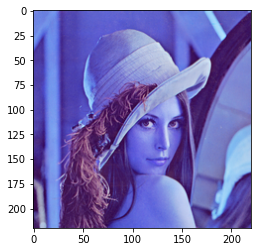

In [3]:
src = cv2.imread('extra/lenna.png')
plt.imshow(src)

Text(0.5, 1.0, 'Gray')

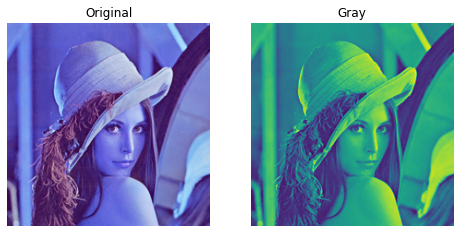

In [4]:
gray = cv2.imread('extra/lenna.png', 0)
# gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 4))
plt.subplot(121);plt.axis('off')
plt.imshow(src);plt.title("Original")
plt.subplot(122);plt.axis('off')
plt.imshow(gray);plt.title("Gray")

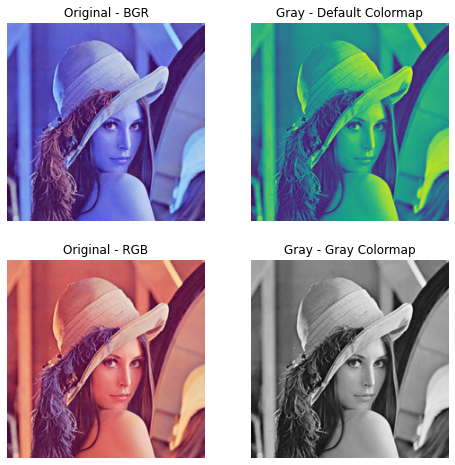

In [5]:
src_rgb = src[..., ::-1]
# src_rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.subplot(221);plt.axis('off')
plt.imshow(src);plt.title("Original - BGR")
plt.subplot(222);plt.axis('off')
plt.imshow(gray);plt.title("Gray - Default Colormap")

plt.subplot(223);plt.axis('off')
plt.imshow(src_rgb);plt.title("Original - RGB")
plt.subplot(224);plt.axis('off')
plt.imshow(gray, cmap='gray');plt.title("Gray - Gray Colormap");

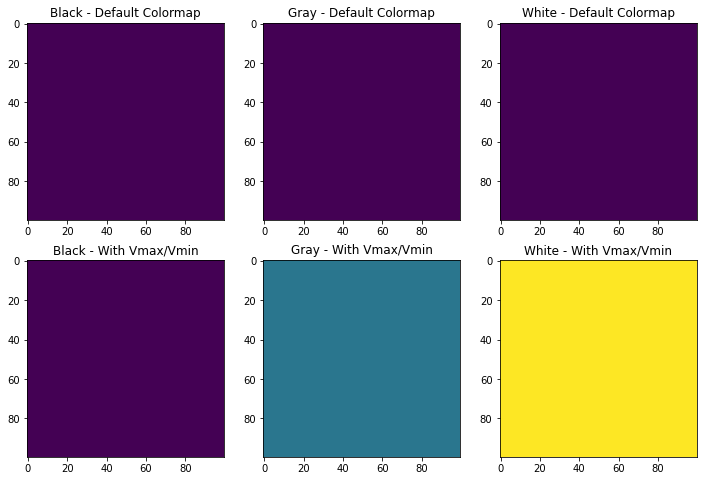

In [6]:
black_sample = np.zeros([100, 100], dtype=np.uint8)
gray_sample  = np.ones([100, 100], dtype=np.uint8) * 100
white_sample = np.ones([100, 100], dtype=np.uint8) * 255

plt.figure(figsize=(12, 8))
plt.subplot(231);plt.title("Black - Default Colormap");plt.imshow(black_sample)
plt.subplot(232);plt.title("Gray - Default Colormap");plt.imshow(gray_sample)
plt.subplot(233);plt.title("White - Default Colormap");plt.imshow(white_sample)
plt.subplot(234);plt.title("Black - With Vmax/Vmin");plt.imshow(black_sample, vmax=255, vmin=0)
plt.subplot(235);plt.title("Gray - With Vmax/Vmin");plt.imshow(gray_sample, vmax=255, vmin=0)
plt.subplot(236);plt.title("White - With Vmax/Vmin");plt.imshow(white_sample, vmax=255, vmin=0)

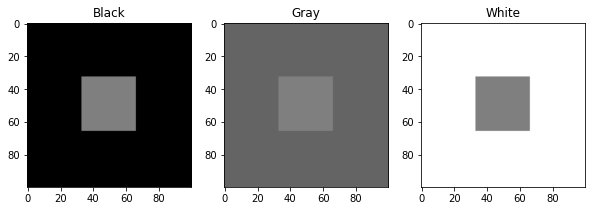

In [7]:

black_sample  = np.zeros([100, 100], dtype=np.uint8)
gray_sample   = np.ones([100, 100], dtype=np.uint8) * 100
white_sample  = np.ones([100, 100], dtype=np.uint8) * 255

black_sample[33:66,33:66] = 127
gray_sample[33:66,33:66]  = 127
white_sample[33:66,33:66] = 127

plt.figure(figsize=(10, 10))
plt.subplot(131);plt.title("Black");plt.imshow(black_sample, vmax=255, vmin=0, cmap='gray')
plt.subplot(132);plt.title("Gray");plt.imshow(gray_sample, vmax=255, vmin=0, cmap='gray')
plt.subplot(133);plt.title("White");plt.imshow(white_sample, vmax=255, vmin=0, cmap='gray')

### Matrix Access
* Numpy vs OpenCV

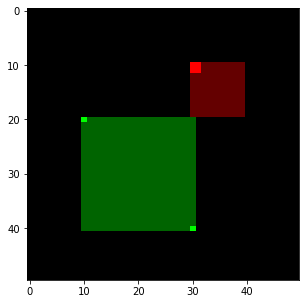

In [8]:
## Numpy
draw_sample  = np.zeros([50, 50, 3], dtype=np.uint8)
draw_sample[10:20, 30:40] = [100, 0, 0]
draw_sample[10:12, 30:32] = [255, 0, 0]

## OpenCV
pt1 = (10, 20)
pt2 = (30, 40)
cv2.rectangle(draw_sample, pt1, pt2, (0, 100, 0), thickness=-1)
cv2.line(draw_sample, pt1, pt1, (0, 255, 0))
cv2.line(draw_sample, pt2, pt2, (0, 255, 0))

plt.figure(figsize=(5, 5))
plt.imshow(draw_sample, vmax=255, vmin=0, cmap='gray')

#### Draw

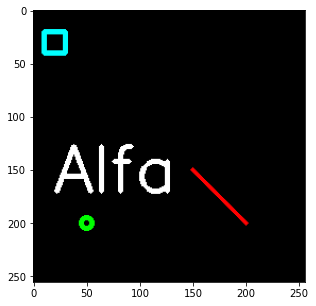

In [9]:
sample_draw  = np.zeros([256, 256, 3], dtype=np.uint8)
center = (50, 200)
cv2.circle(sample_draw, center, 5, [0,255,0], 4)
cv2.rectangle(sample_draw, (10, 20), (30, 40), (0, 255, 255), 3)
cv2.line(sample_draw, (150, 150), (200, 200), (255, 0, 0), 3)
cv2.putText(sample_draw, "Alfa", (20, 170), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)

plt.figure(figsize=(5, 5))
plt.imshow(sample_draw, vmax=255, vmin=0, cmap='gray')

# Part Two - More Functions

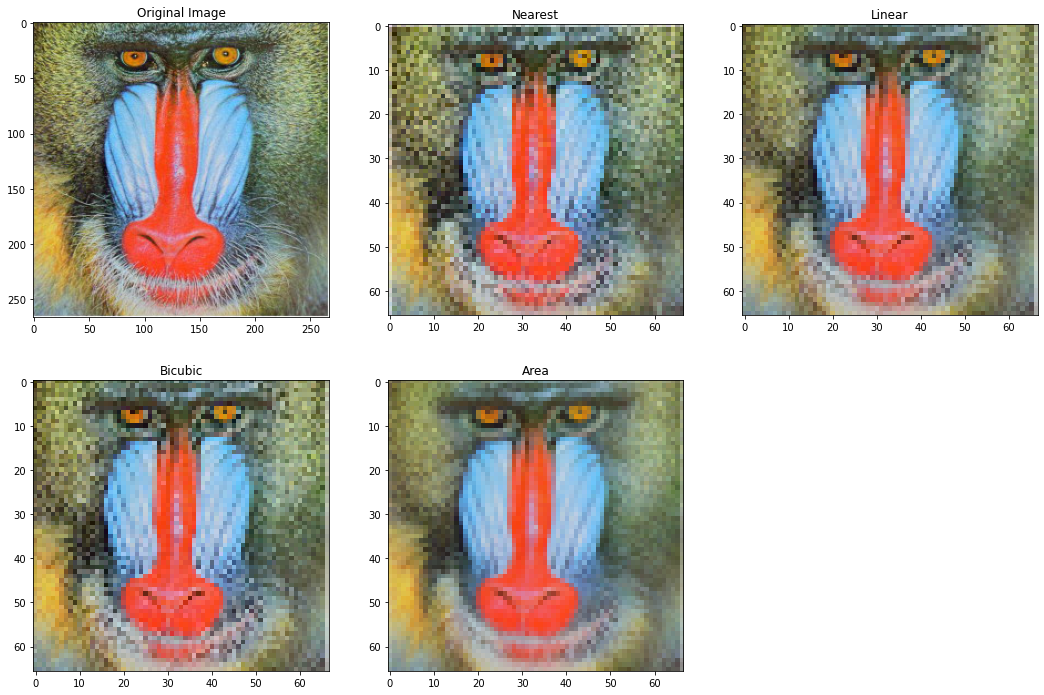

In [87]:
## Resize

baboon_path   = r"extra/baboon.png"
baboon_img    = cv2.imread(baboon_path)[..., ::-1]

scale_factor  = 1/4
baboon_naer   = cv2.resize(baboon_img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)
baboon_linear = cv2.resize(baboon_img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
baboon_cubic  = cv2.resize(baboon_img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)
baboon_area   = cv2.resize(baboon_img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_AREA)

plt.figure(figsize=(18, 12))
plt.subplot(231);plt.title('Original Image');plt.imshow(baboon_img)
plt.subplot(232);plt.title('Nearest');plt.imshow(baboon_naer)
plt.subplot(233);plt.title('Linear');plt.imshow(baboon_linear)
plt.subplot(234);plt.title('Bicubic');plt.imshow(baboon_cubic)
plt.subplot(235);plt.title('Area');plt.imshow(baboon_area);

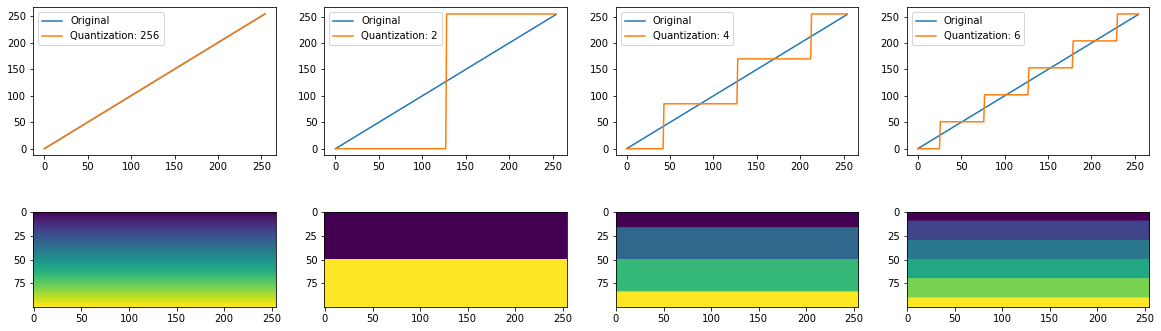

In [88]:
## Color Quantization

plt.figure(figsize=(20, 6))
values = np.array(list(range(0, 255)))
step = [255//255, 255, 255//3, 255//5]

for idx, Q in enumerate(step):
    plt.subplot(2, len(step),idx+1)
    plt.plot(values, label="Original")
    qvalues = np.round(values/Q)*Q
    plt.plot(qvalues, label=f"Quantization: {(255//Q)+1}")
    plt.legend()
    
    view = cv2.resize(qvalues[:, None], (255,100))
    plt.subplot(2, len(step), idx + 1 + len(step) )
    plt.imshow(view)

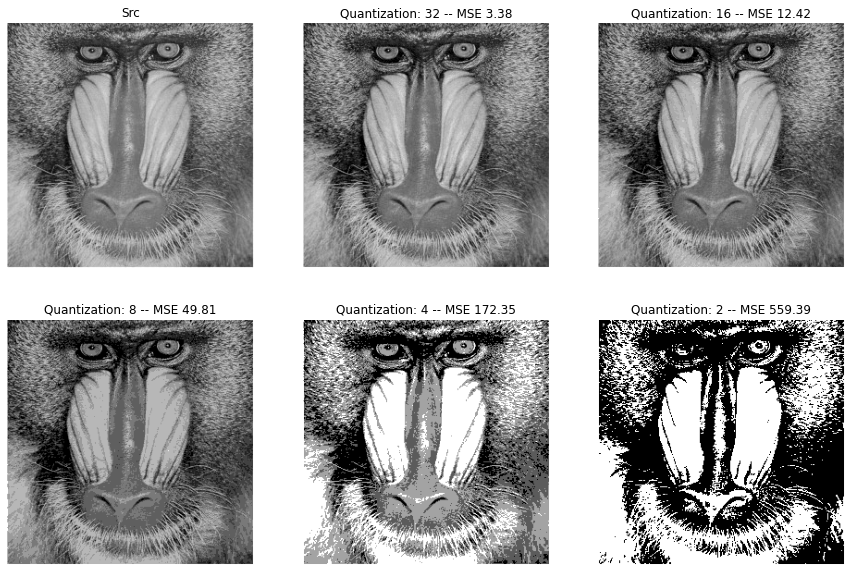

In [89]:
## Color Quantization

def get_segmented_img(src, num_colors=2):
    """ Return the src image with just num_colors. """
    vector             = src.reshape(-1).astype(np.float32) # 3 channel to 1 
    criteria           = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 5, 1.0)
    _, labels, centers = cv2.kmeans(vector, num_colors, None, criteria, attempts=5, flags=cv2.KMEANS_PP_CENTERS)
    # center: value of kmeans cluster center, in other words the final color 
    # label: index of associeted cluster per pixel

    labels_w_color  = centers[labels.flatten()] 
    segmented       = labels_w_color.reshape((src.shape)).astype(np.uint8)
    return segmented 

src             = cv2.imread(baboon_path, 0)
num_colors_list = [32, 16, 8, 4, 2]

plt.figure(figsize=(15, 10))
plt.subplot(231);plt.title("Src");plt.axis('off');plt.imshow(src, cmap='gray')
for idx, num_colors in enumerate(num_colors_list):
    plt.subplot(2,3, idx + 2)
    seg = get_segmented_img(src, num_colors)
    mse = np.mean((src.astype(np.int) - seg) ** 2)
    plt.title(f"Quantization: {num_colors} -- MSE {mse:0.2f}");plt.axis('off')
    plt.imshow(seg, cmap='gray')

# Part Three - More Commands

# Part Four - RoboCIn Initial Challenge